In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def reshape_for_img(array, new_shape):
    return (
        array.
        reshape(new_shape).
        astype(np.uint8)
    )

def transform_img(f, img, func, outputMax=255, inputMax=255):
    img_shape = img.size[::-1] + (3,)
    
    processed_array = reshape_for_img(
        func(f, outputMax, inputMax), 
        img_shape)

    return Image.fromarray(processed_array)

Define the different transformation functions:

(numpy's functions are vectorized, which is fast for big arrays)

In [3]:
def threshold_func(f, outputMax, inputMax):
    return (f > int(255/2))*255

def negate_func(f, outputMax, inputMax):
    return 255 - f

def log_func(f, outputMax, inputMax):
    c = outputMax/np.log10(inputMax+1) 
    g = c * np.log10(1 + f)
    return g

def gamma_func(f, outputMax, inputMax):
    c = (outputMax)/(inputMax**2)
    g = c * (f**2)
    return g

It takes just over 30 seconds to convert the pixel value to numpy array.

We also use cell magic and line magic to calculate the time: https://stackoverflow.com/a/38319381/3820738

In [4]:
%%time
# Read in the image:
sunset = Image.open("C:\\Users\\Nam Le\\sunsetsmall.jpg")
f = np.array(sunset.getdata())

# Now, we use list comprehension to apply different transformation on the existing image:
new_sunsets = [sunset] + [
    transform_img(f, sunset, fun) for fun in [
        log_func, negate_func, gamma_func, threshold_func]
]

Wall time: 146 ms


In [5]:
%%time
# Read in the image:
flower = Image.open("C:\\Users\\Nam Le\\flowersmall.jpg")
f = np.array(flower.getdata())

# Now, we use list comprehension to apply different transformation on the existing image:
new_flowers = [flower] + [
    transform_img(f, flower, fun) for fun in [
        log_func, negate_func, gamma_func, threshold_func]
]

Wall time: 529 ms


In [6]:
%%time
# Read in the image:
house = Image.open("C:\\Users\\Nam Le\\housesmall.jpg")
f = np.array(house.getdata())

# Now, we use list comprehension to apply different transformation on the existing image:
new_houses = [house] + [
    transform_img(f, house, fun) for fun in [
        log_func, negate_func, gamma_func, threshold_func]
]

Wall time: 587 ms


In [7]:
%%time
# Read in the image:
leaf = Image.open("C:\\Users\\Nam Le\\leafsmall.jpg")
f = np.array(leaf.getdata())

# Now, we use list comprehension to apply different transformation on the existing image:
new_leaves = [leaf] + [
    transform_img(f, leaf, fun) for fun in [
        log_func, negate_func, gamma_func, threshold_func]
]

Wall time: 532 ms


How to plot multiple images: https://stackoverflow.com/questions/46615554/how-to-display-multiple-images-in-one-figure-correctly/46616645 (more detailed arrangement parameters there).

`tight_layout`: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.tight_layout.html

Wall time: 1.91 s


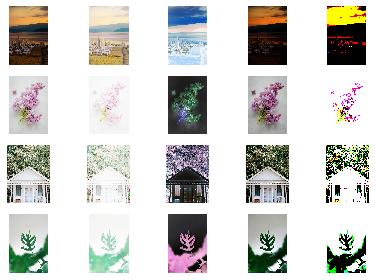

In [8]:
%%time
new_images = new_sunsets + new_flowers + new_houses + new_leaves

columns = 5
rows = 4
fig = plt.figure()
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(new_images[i-1])
    plt.axis("off")
fig.tight_layout()
# plt.show()
plt.savefig("all-transformation", dpi=300)

All the results are in the `new_images` list now. For example, if we want the log transform image, you can just print the first component of the list, such as `new_images[0]`.